Imports

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [7]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/train",
                                          target_size=(32,32),
                                          batch_size = 30,
                                          class_mode = 'binary',subset='training')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/train",
                                          target_size=(32,32),
                                          batch_size = 30,
                                          class_mode = 'binary',subset='validation')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test",
                                          target_size=(32,32),
                                          batch_size =30,
                                          class_mode = 'binary')

test_dataset.class_indices

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


{'SNGAN_pixelshuffle_test': 0, 'imagewoof_test': 1}

Design Model

In [8]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))

# # Convolutional layer and maxpool layer 2
# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.MaxPool2D(2,2))

# # Convolutional layer and maxpool layer 3
# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(32,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [9]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(train_dataset,
        #  steps_per_epoch = 80,
         epochs = 150,
         callbacks=[early_stopping],
         validation_data = validation_dataset
         )

Epoch 1/150
 7/43 [===>..........................] - ETA: 0s - loss: 0.7220 - accuracy: 0.5238 

2022-06-01 12:35:09.685387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 13ms/step - loss: 0.6555 - accuracy: 0.6109 - val_loss: 0.5895 - val_accuracy: 0.7531
Epoch 2/150
 7/43 [===>..........................] - ETA: 0s - loss: 0.5529 - accuracy: 0.7857

2022-06-01 12:35:10.233982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 0s 11ms/step - loss: 0.5727 - accuracy: 0.7305 - val_loss: 0.5412 - val_accuracy: 0.7219
Epoch 3/150
43/43 [==============================] - 0s 11ms/step - loss: 0.4890 - accuracy: 0.7750 - val_loss: 0.4925 - val_accuracy: 0.7750
Epoch 4/150
43/43 [==============================] - 0s 11ms/step - loss: 0.4394 - accuracy: 0.8070 - val_loss: 0.5574 - val_accuracy: 0.7094
Epoch 5/150
43/43 [==============================] - 0s 10ms/step - loss: 0.4177 - accuracy: 0.8180 - val_loss: 0.4116 - val_accuracy: 0.8250
Epoch 6/150
43/43 [==============================] - 0s 11ms/step - loss: 0.3561 - accuracy: 0.8547 - val_loss: 0.3738 - val_accuracy: 0.8469
Epoch 7/150
43/43 [==============================] - 0s 10ms/step - loss: 0.3372 - accuracy: 0.8648 - val_loss: 0.4054 - val_accuracy: 0.8188
Epoch 8/150
43/43 [==============================] - 0s 10ms/step - loss: 0.3204 - accuracy: 0.8672 - val_loss: 0.3872 - val_accuracy: 0.8531
Epoch 9/150
43/43 

ValueError: x and y must have same first dimension, but have shapes (38,) and (36,)

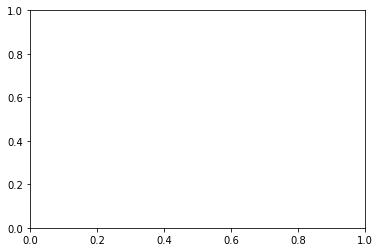

In [10]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(38)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

In [ ]:
_, acc = model.evaluate(test_dataset)
print('Trained with Pixelsuffle')
print('Pixelsuffle: ' ,acc *100)

test_dataset2 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test",
                                          target_size=(32,32),
                                          batch_size =30,
                                          class_mode = 'binary')
print(test_dataset.image_shape())
_, acc = model.evaluate(test_dataset2)
print('Bilinear: ' ,acc *100)

test_dataset3 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size =30,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset3)
print('Bicubic: ' ,acc *100)

NameError: name 'model' is not defined

Prediction

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test/imagewoof_test/985.jpg")


In [ ]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test/SNGAN_pixelshuffle_test/824.jpg")